## Introduction To Classification
<br>
<p>In this example, we will be going through some basic classification techniques. Classification is s supervised machine learning task where instead of predicting a continous value (for eg. car price, house price etc.) we predict discontinuous values (or discrete values). These values can be any type and are genreally called as labels. Most of the common/popular examples include predicting labels of 2 types : yes/no or 0/1 or True/False.</p>
<p>For eg. if we have an email dataset where we want to classify emails as SPAM or HAM then we have 2 labels: one label is SPAM and the other label is HAM. Similarly, if we have to predict breast cancer of 4 types (Type_1, Type_2, Type_3 and Type_4 breast cancer) then these 4 types could be considered as the labels.</p>
<p>Classification of the second type(i.e. the second example) which involves more than 2 labels is called as multi-label classification whereas classification where we require 2 labels only is binary classification</p>

<p>First, we start as importing the regular libraries popular in any machine learning project</p>

In [1]:
import numpy as np
import pandas as pd

import os
import sys

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

</p>After importing the basic set of libraries, we set some of the parameters of the functions which will be useful later on in the code. Read the comments above the code to understand what is being done.</p>

In [2]:
# set the parameters that control the size of the axes and the x and y labels in the plots
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# the folders where we will save the relevant output of our code
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "chapter_3"
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, CHAPTER_ID, 'images')

### Basic Preliminaries

</p>Define a function to save the images in a new folder in the directory `chapter_3\images\` and the image name will be taken from the figure id (a number to identify the plot) and saved as a `PNG` file.</p>

<p>The `os.path.join()` function creates a path by combining the parameters passed to it. If the last parameter passed is an extension (see code below) then it saves a file. For more information on `os.path.join()` [cick here.](https://stackoverflow.com/questions/20645420/how-does-os-path-join-work)</p>
<p>The `tight_layout` option makes subplots within a plot look nice and evenly spaced. It adds some space between two plots so that their axes are readable. For more information on how `tight_layout` works [click here.](https://stackoverflow.com/questions/9603230/how-to-use-matplotlib-tight-layout-with-figure) </p>

In [3]:
# set tight_layout to True because we want our plots to look nice and clean
def save_fig(fig_id, tight_layout = True, fig_extension='png', resolution=360):
    
    # returns a string of the path where we need to save the image file(s).
    path = os.path.join(IMAGE_PATH, fig_id + '.' + fig_extension)
    
    # create a directory if the default image directory does not exist
    if not os.path.isdir(IMAGE_PATH):
        os.makedirs(IMAGE_PATH)
        
    # sometimes it is good to print a message; image plotting can be slow and time consuming sometimes
    # best tell user what the code is doing or the user might be fooled into thinking the code crashed
    print("Saving figure....", fig_id)
    
    # plot the figure (with tight layout)
    if tight_layout:
        plt.tight_layout()
    
    # save the figure in the path specified earlier in png format
    plt.savefig(path, format=fig_extension, dpi = 360)

<p>The MNIST dataset is considered as the _hello world_ program of classification in machine learning. It is a collection of 70,000 images of handwritten digits from 0 to 9 by people of various age groups. Any classification model that we build, we would always like to test it out on the MNIST dataset to see how it performs.</p>
<p>Thankfully, _scikit-learn_ makes it easy for us to access the MNIST dataset. It consists of many pre-loaded datasets that we can call anytime. The same goes for MNIST dataset. We can directly load the mnist dataset from _scikit-learn._</p>
<p>The MNIST dataset is already divided into train-set and test-set so we won't have to go through the trouble of splitting the data into train and test sets. We do however, need to sort the MNIST dataset _scikit-learn_ returns the MNIST dataset in unordered form. For more information on the MNIST dataset [click here](http://yann.lecun.com/exdb/mnist/).</p>

<p>However, before we proceed let us first create a function which sorts the MNIST dataset. I will describe the MNIST dataset below so let us first walk throught the function and then understand what the dataset looks like. On a side note, the `target` attribute of any dataset in `sklearn` consists of an array of labels, in this case the `target` is an array consisting of the labels of the images.</p>

In [4]:
# define the function which takes the MNIST dataset as parameter
def sort_by_target(mnist):
    
    # a numpy array which stores the sorted target labels from 0 to 9
    # the values are first enumerated and then the (target, enumeration) pair is sorted
    # the first sorting is done on target key and after sorting on target values, the sorting is done on enumeration
    # the process is the same for train and test sets
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:,1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:,1]
    
    # reorder the first 60000 entries in the mnist dataset that was passed to us using indices obtained above
    mnist.data[:60000] = mnist.data[reorder_train]
    # similar logic as above is applied for reordering the target array 
    mnist.target[:60000] = mnist.target[reorder_train]
    
    # the indices from 60000 to 70000 in the original dataset represented test data
    # to reorder the original test data indices we add 60000 to to the reordered test array
    # this gives us indices from 60000 to 70000
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

<p>Now that the function to sort the MNIST dataset is defined properly, time to load the dataset:</p>

In [5]:
# import the required library for MNIST dataset
from sklearn.datasets import fetch_openml

# specify the MNIST dataset to load in the library; it contains other datasets also
mnist = fetch_openml('mnist_784', version=1, cache=True)

# sklearn returns the target column as strings; we need integers; convert to int
mnist.target = mnist.target.astype(np.int8)

# sort the mnist dataset by target attribute
sort_by_target(mnist)

# display the dataset
mnist['data'], mnist['target']

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

### About The Dataset

<p> The MNIST dataset as mentioned earlier, contains a collection of 70000 handwritten images of digits from 0 to 9. These images are 28px by 28px which means they are 28 pixels wide and 28 pixels high.

In [6]:
mnist.data.shape

(70000, 784)

In [7]:
# create the X matrix and y label vector from the mnist dataset
X, y = mnist['data'], mnist['target']

In [8]:
print("shape of X : ", X.shape)
print("shape of Y : ", y.shape)

shape of X :  (70000, 784)
shape of Y :  (70000,)


Saving figure.... some_digit_plot


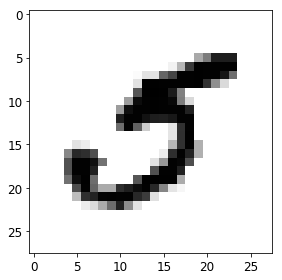

In [9]:
# grab some random digit from the training set X
some_digit = X[36000]

# reshape the digit to original specifications ie. 28x28
some_digit_image = some_digit.reshape(28, 28)

# plot the image
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis('on')

# save the figure
save_fig('some_digit_plot')

In [ ]:
# using the above logic create a function to plot any digit
def plot_digit(data, save=False):
    
    # reshape the data into a 28x28 matrix
    image = data.reshape(28, 28)
    
    # plot the image
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation='nearest')
    plt.axis('on')
    
    # if the save paramter is True, save the image
    # by default, the save parameter has been set to False
    if save is True:
        
        print("saving the figure...")
        
        # import datetime library
        from datetime import datetime
        
        # get the current time and convert to string
        # only extract minute, second and micro-seconds
        # this will be enough to ensure a unique file-name for saving the image
        x = datetime.now().time()
        x = x.strftime("%M%S%f")
        
        # save the figure with unique name
        save_fig('random_image' + x)

In [ ]:
some_digit = X[36000]
plot_digit(some_digit)

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [ ]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [10]:
# split the dataset into train and test dataset
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

<p>It is important to shuffle the train set so as to randomize the entries. This applies to both the training set and the labels corresponding to the training set. A randomized order of elements ensure that the model does not learn the inherent pattern as a consequence of ordered nature of the data.</p>

In [11]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Binary Classification

<p>Here I will first attempt to perform classification on a binary classifier, ie. I will check if a given digit is a 5 or not. For that, the only extra thing we need is a set of labels containing 1 to represent 5 and 0 for everything else.</p>

In [12]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

<p><b>Note:</b> Some of the hyperparameters in Scikit-Learn libraries have to be set exlpicitly or they will generate a warning message. To avoid the warnings the hyperparameters have been set to their given values.</p>

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [17]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.9187 ,  0.95185,  0.9459 ])